In [ ]:
pip install -U scikit-learn

In [ ]:
pip install pmdarima


In [ ]:
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from math import  sqrt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import statistics as st
from scipy.stats import mode, skew, kurtosis
import seaborn as sns
import random
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout


import pandas as pd
import joblib
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.preprocessing import sequence
from keras.layers import Dense, LSTM, RNN, GRU, Dropout, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import skew, kurtosis

from torch import nn
from torch.utils.data import DataLoader, Dataset
from datetime import datetime, timedelta
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

from IPython.display import display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [ ]:
eth_df = pd.read_csv("/content/Bitcoin Historical Data.csv")
eth_df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2024,"67,760.8","67,533.9","67,861.0","67,449.6",19.01K,0.34%
1,05/31/2024,"67,530.1","68,352.3","69,018.2","66,676.8",61.51K,-1.21%
2,05/30/2024,"68,354.7","67,631.3","69,504.7","67,138.4",66.84K,1.06%
3,05/29/2024,"67,635.8","68,366.2","68,897.6","67,143.2",52.13K,-1.07%
4,05/28/2024,"68,366.0","69,428.3","69,560.7","67,299.9",71.39K,-1.53%
...,...,...,...,...,...,...,...
1915,03/05/2019,"3,857.2","3,715.9","3,873.2","3,705.7",3.82M,3.80%
1916,03/04/2019,"3,715.9","3,809.7","3,828.4","3,681.8",2.85M,-2.45%
1917,03/03/2019,"3,809.5","3,823.2","3,836.6","3,789.7",1.51M,-0.36%
1918,03/02/2019,"3,823.1","3,821.9","3,843.2","3,783.6",1.61M,0.03%


###Data processing

In [ ]:
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df.reset_index(drop=True)
eth_df.set_index('Date', inplace=True)
eth_df.sort_index(ascending=True, inplace=True)

In [ ]:
# Hàm để chuyển đổi giá trị có 'K', 'M', hoặc 'B' thành số thực.
def convert_volume(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1e3
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    else:
        return float(value)

# Áp dụng hàm cho mỗi giá trị trong cột 'Vol.'.
eth_df['Vol.'] = eth_df['Vol.'].apply(convert_volume)

In [ ]:
# Hàm để chuyển đổi giá trị có dấu % thành số thực.
def convert_percent_to_float(value):
    return float(value.replace('%', '')) / 100

# Giả sử etr_df là DataFrame của bạn với cột 'Percentage' cần được chuyển đổi.
# etr_df['Percentage'] = ...

# Áp dụng hàm cho mỗi giá trị trong cột 'Percentage'.
eth_df['Change %'] = eth_df['Change %'].apply(convert_percent_to_float)


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,"3,821.9","3,816.7","3,855.8","3,816.4",1740000.0,0.0014
2019-03-02,"3,823.1","3,821.9","3,843.2","3,783.6",1610000.0,0.0003
2019-03-03,"3,809.5","3,823.2","3,836.6","3,789.7",1510000.0,-0.0036
2019-03-04,"3,715.9","3,809.7","3,828.4","3,681.8",2850000.0,-0.0245
2019-03-05,"3,857.2","3,715.9","3,873.2","3,705.7",3820000.0,0.0380
...,...,...,...,...,...,...
2024-05-28,"68,366.0","69,428.3","69,560.7","67,299.9",71390.0,-0.0153
2024-05-29,"67,635.8","68,366.2","68,897.6","67,143.2",52130.0,-0.0107
2024-05-30,"68,354.7","67,631.3","69,504.7","67,138.4",66840.0,0.0106


In [ ]:
eth_df['Price'] = eth_df['Price'].str.replace(',', '').astype(float)
eth_df['Open'] = eth_df['Open'].str.replace(',', '').astype(float)
eth_df['High'] =eth_df['High'].str.replace(',', '').astype(float)
eth_df['Low'] = eth_df['Low'].str.replace(',', '').astype(float)
eth_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,3821.9,3816.7,3855.8,3816.4,1740000.0,0.0014
2019-03-02,3823.1,3821.9,3843.2,3783.6,1610000.0,0.0003
2019-03-03,3809.5,3823.2,3836.6,3789.7,1510000.0,-0.0036
2019-03-04,3715.9,3809.7,3828.4,3681.8,2850000.0,-0.0245
2019-03-05,3857.2,3715.9,3873.2,3705.7,3820000.0,0.0380
...,...,...,...,...,...,...
2024-05-28,68366.0,69428.3,69560.7,67299.9,71390.0,-0.0153
2024-05-29,67635.8,68366.2,68897.6,67143.2,52130.0,-0.0107
2024-05-30,68354.7,67631.3,69504.7,67138.4,66840.0,0.0106


In [ ]:
eth_df['Price'].plot(figsize=(12,6),color='red')

plt.plot(eth_df['Price'])

TypeError: no numeric data to plot

In [ ]:
eth_df['Price']

Date
2019-03-01     3821.9
2019-03-02     3823.1
2019-03-03     3809.5
2019-03-04     3715.9
2019-03-05     3857.2
               ...   
2024-05-28    68366.0
2024-05-29    67635.8
2024-05-30    68354.7
2024-05-31    67530.1
2024-06-01    67760.8
Name: Price, Length: 1920, dtype: float64

###Split data 6:4



In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.6
test_size = 0.4

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1152

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

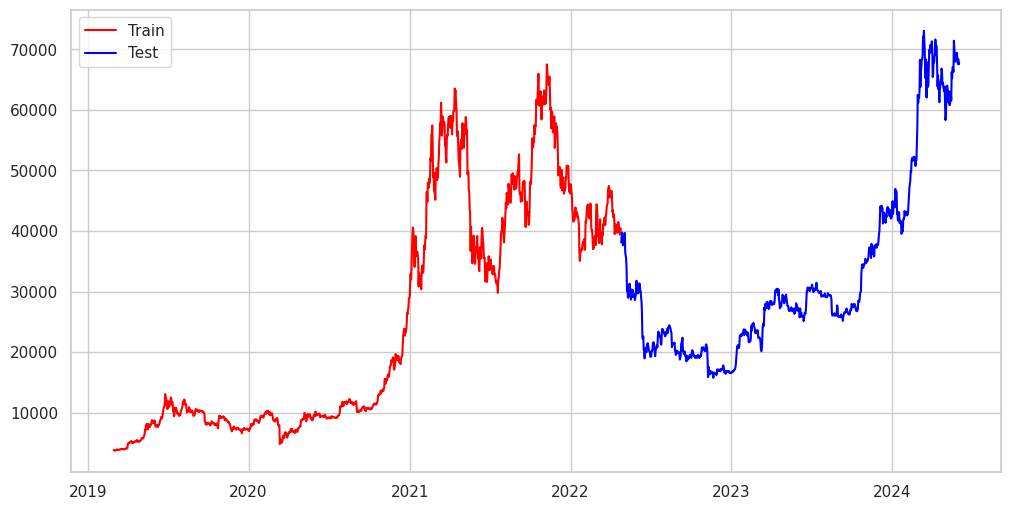

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1920 non-null   float64
 1   Open        1920 non-null   float64
 2   High        1920 non-null   float64
 3   Low         1920 non-null   float64
 4   Vol.        1920 non-null   float64
 5   Change %    1920 non-null   float64
 6   Price_diff  1913 non-null   float64
dtypes: float64(7)
memory usage: 120.0 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff
Date,,,,,,,
2019-03-01,3821.9,3816.7,3855.8,3816.4,1740000.0,0.0014,NaN
2019-03-02,3823.1,3821.9,3843.2,3783.6,1610000.0,0.0003,NaN
2019-03-03,3809.5,3823.2,3836.6,3789.7,1510000.0,-0.0036,NaN
2019-03-04,3715.9,3809.7,3828.4,3681.8,2850000.0,-0.0245,NaN
2019-03-05,3857.2,3715.9,3873.2,3705.7,3820000.0,0.0380,NaN
...,...,...,...,...,...,...,...
2024-05-28,68366.0,69428.3,69560.7,67299.9,71390.0,-0.0153,-1773.9
2024-05-29,67635.8,68366.2,68897.6,67143.2,52130.0,-0.0107,-1519.6
2024-05-30,68354.7,67631.3,69504.7,67138.4,66840.0,0.0106,379.0


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

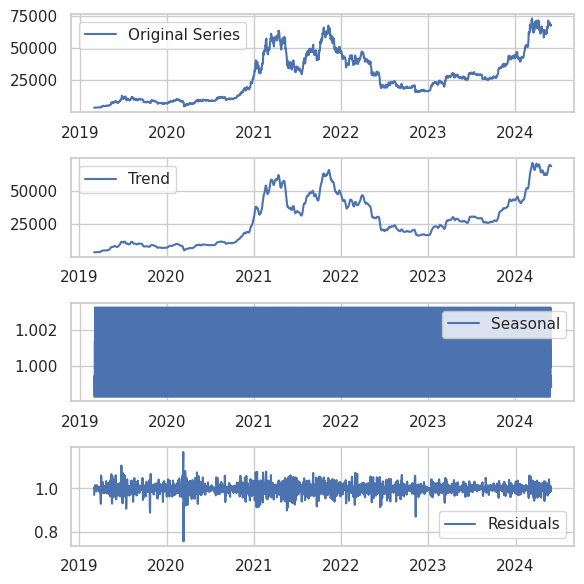

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(6,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,3821.9,3816.7,3855.8,3816.4,1740000.0,0.0014,44.0,3
2019-03-02,3823.1,3821.9,3843.2,3783.6,1610000.0,0.0003,44.0,3
2019-03-03,3809.5,3823.2,3836.6,3789.7,1510000.0,-0.0036,44.0,3
2019-03-04,3715.9,3809.7,3828.4,3681.8,2850000.0,-0.0245,44.0,3
2019-03-05,3857.2,3715.9,3873.2,3705.7,3820000.0,0.0380,44.0,3
...,...,...,...,...,...,...,...,...
2024-05-28,68366.0,69428.3,69560.7,67299.9,71390.0,-0.0153,-1773.9,5
2024-05-29,67635.8,68366.2,68897.6,67143.2,52130.0,-0.0107,-1519.6,5
2024-05-30,68354.7,67631.3,69504.7,67138.4,66840.0,0.0106,379.0,5


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,3941.461290,3932.316129,3972.116129,3895.335484,2.637097e+06,0.002406,58.248387,3.0
2019-04-30,5148.216667,5107.760000,5237.056667,5025.746667,1.798474e+06,0.009313,292.786667,4.0
2019-05-31,7295.803226,7191.551613,7470.841935,7012.570968,1.416096e+06,0.016413,727.903226,5.0
2019-06-30,9404.706667,9329.010000,9707.633333,9021.913333,7.688410e+05,0.009213,757.670000,6.0
2019-07-31,10672.509677,10696.096774,11071.674194,10257.441935,7.639442e+05,-0.000965,-454.912903,7.0
...,...,...,...,...,...,...,...,...
2024-02-29,49866.606897,49225.993103,50426.855172,48647.110345,5.791931e+04,0.012852,3258.548276,2.0
2024-03-31,67682.903226,67353.406452,69242.709677,65591.245161,8.757516e+04,0.005697,3280.258065,3.0
2024-04-30,65877.343333,66234.613333,67404.343333,64228.636667,9.018267e+04,-0.005017,-1575.620000,4.0


<Axes: xlabel='Date'>

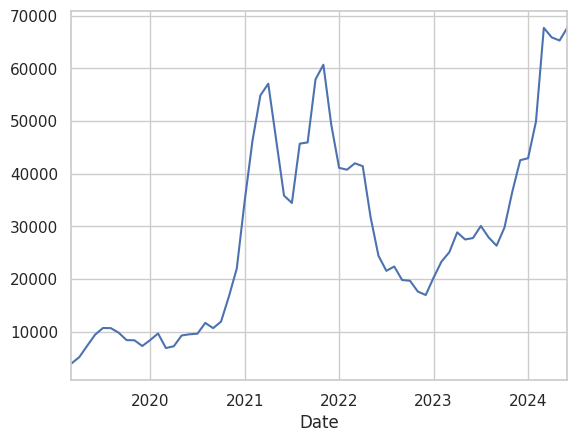

In [ ]:
df_monthly['Price'].plot()

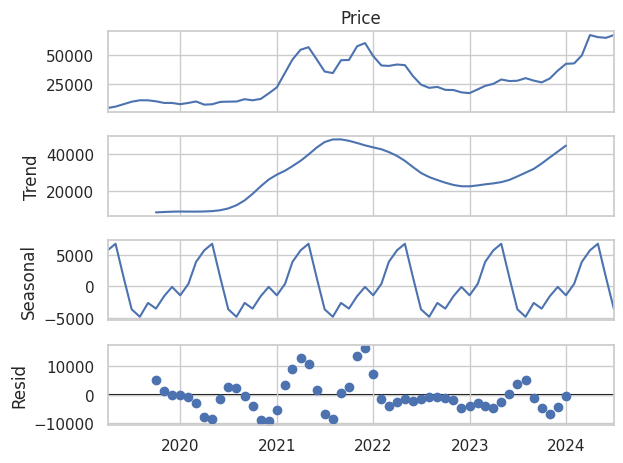

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=12.58 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=36038.433, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=33017.088, Time=4.22 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=34689.097, Time=2.99 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=36048.380, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=33573.688, Time=0.33 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=32830.898, Time=11.47 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=16.90 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=10.76 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=36040.893, Time=1.48 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=32831.040, Time=14.79 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=32831.269, Time=14.08 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=34690.144, Time=7.32 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=32829.672, Time=14.79 sec
 ARIMA(2,0,1)(1,1,0)[7] interc

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (4,0,1),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1920
Model:             SARIMAX(4, 0, 1)x(2, 1, [], 7)   Log Likelihood              -16415.736
Date:                            Tue, 18 Jun 2024   AIC                          32847.473
Time:                                    09:43:48   BIC                          32891.924
Sample:                                03-01-2019   HQIC                         32863.831
                                     - 06-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8373      0.029     63.413      0.000       1.780       1.894
ar.L2         -0.6870      0.040    -17.239      0.000      -0.765      -0.609
ar.L3         -0.1920      0.035     -5.442      0.000      -0.261      -0.123
ar.L4          0.0416      0.017      2.429      0.015       0.008       0.075
ma.L1         -0.9960      0.024    -40.836      0.000      -1.044      -0.948
ar.S.L7       -0.6802      0.014    -47.554      0.000      -0.708      -0.652
ar.S.L14      -0.3417      0.014    -24.535      0.000      -0.369      -0.314
sigma2      1.746e+06   5.46e-09   3.19e+14      0.000    1.75e+06    1.75e+06
===================================================================================
Ljung-Box (L1) (Q):                  10.01   Jarque-Bera (JB):              2336.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.92   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+30. Standard errors may be unstable.
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2022-04-26    40414.275910
2022-04-27    38157.850847
2022-04-28    38506.168952
2022-04-29    39336.179078
2022-04-30    38835.336331
                  ...     
2024-05-28    68131.706719
2024-05-29    68990.270905
2024-05-30    67612.308414
2024-05-31    68049.187055
2024-06-01    67734.662572
Freq: D, Name: predicted_mean, Length: 768, dtype: float64

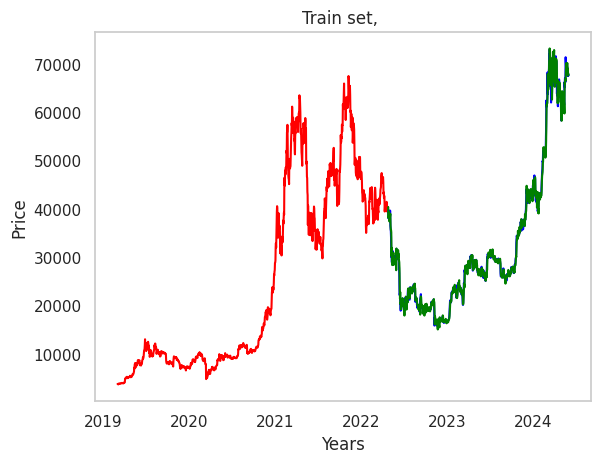

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
# calculate MAE
print('MSE = ', mean_absolute_error(test, predictions))


# calculate MSE
print('MSE = ', mean_squared_error(test, predictions))

# and RMSE
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MSE =  733.4641171350407
MSE =  1287632.0478890948
RMSE =  1134.738757551312


In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.02259436815462504
MAE =  733.4641171350407
RMSE =  1134.738757551312


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("Close price ")
plt.ylabel("Close price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("SARIMAX on Ethereum 6:4")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 7:3

In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.7
test_size = 0.3

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1344

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

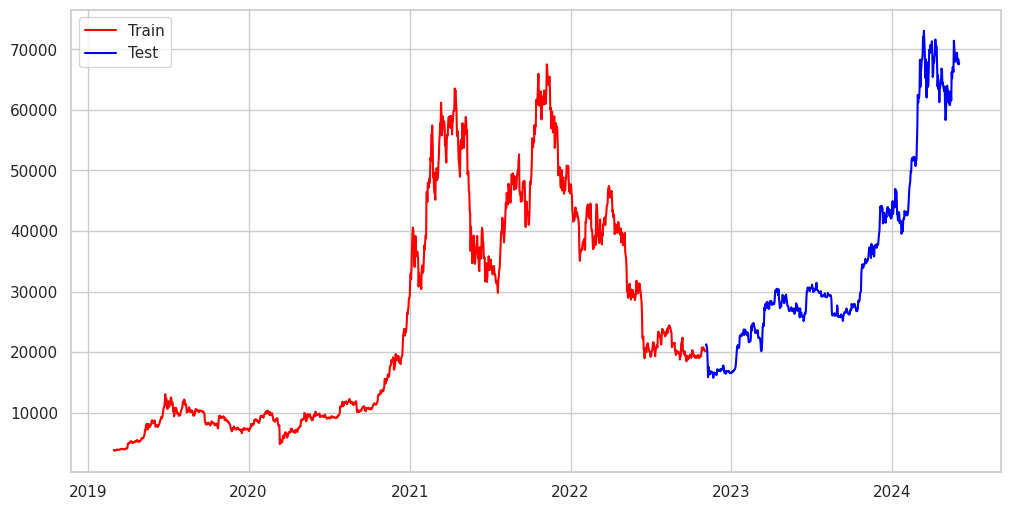

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1920 non-null   float64
 1   Open         1920 non-null   float64
 2   High         1920 non-null   float64
 3   Low          1920 non-null   float64
 4   Vol.         1920 non-null   float64
 5   Change %     1920 non-null   float64
 6   Price_diff   1913 non-null   float64
 7   month_index  1920 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 127.5 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,3821.9,3816.7,3855.8,3816.4,1740000.0,0.0014,NaN,3
2019-03-02,3823.1,3821.9,3843.2,3783.6,1610000.0,0.0003,NaN,3
2019-03-03,3809.5,3823.2,3836.6,3789.7,1510000.0,-0.0036,NaN,3
2019-03-04,3715.9,3809.7,3828.4,3681.8,2850000.0,-0.0245,NaN,3
2019-03-05,3857.2,3715.9,3873.2,3705.7,3820000.0,0.0380,NaN,3
...,...,...,...,...,...,...,...,...
2024-05-28,68366.0,69428.3,69560.7,67299.9,71390.0,-0.0153,-1773.9,5
2024-05-29,67635.8,68366.2,68897.6,67143.2,52130.0,-0.0107,-1519.6,5
2024-05-30,68354.7,67631.3,69504.7,67138.4,66840.0,0.0106,379.0,5


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

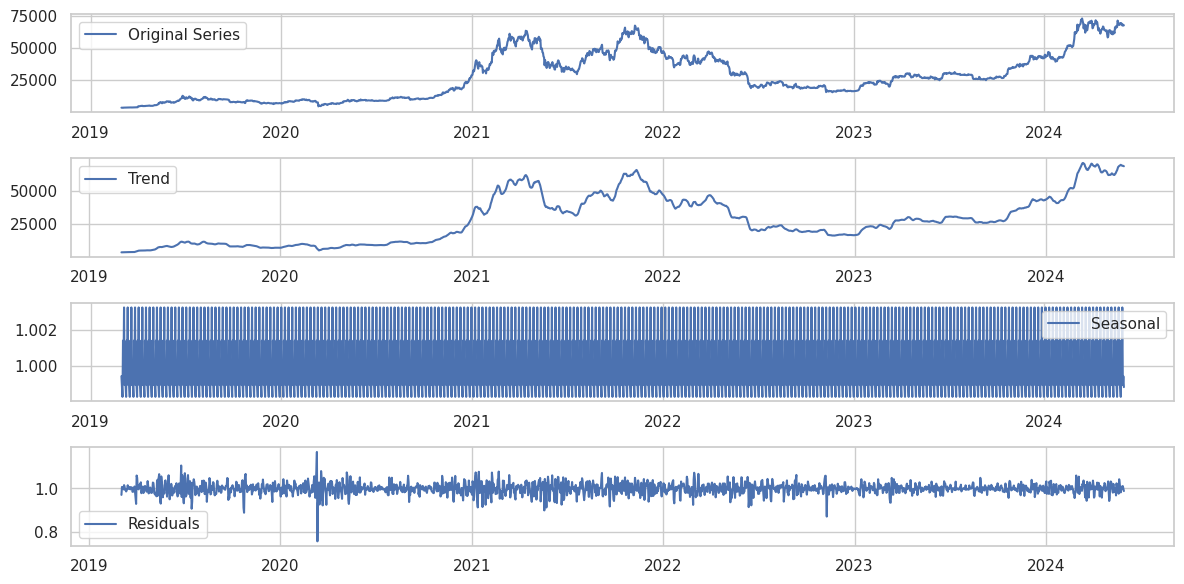

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,3821.9,3816.7,3855.8,3816.4,1740000.0,0.0014,44.0,3
2019-03-02,3823.1,3821.9,3843.2,3783.6,1610000.0,0.0003,44.0,3
2019-03-03,3809.5,3823.2,3836.6,3789.7,1510000.0,-0.0036,44.0,3
2019-03-04,3715.9,3809.7,3828.4,3681.8,2850000.0,-0.0245,44.0,3
2019-03-05,3857.2,3715.9,3873.2,3705.7,3820000.0,0.0380,44.0,3
...,...,...,...,...,...,...,...,...
2024-05-28,68366.0,69428.3,69560.7,67299.9,71390.0,-0.0153,-1773.9,5
2024-05-29,67635.8,68366.2,68897.6,67143.2,52130.0,-0.0107,-1519.6,5
2024-05-30,68354.7,67631.3,69504.7,67138.4,66840.0,0.0106,379.0,5


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,3941.461290,3932.316129,3972.116129,3895.335484,2.637097e+06,0.002406,58.248387,3.0
2019-04-30,5148.216667,5107.760000,5237.056667,5025.746667,1.798474e+06,0.009313,292.786667,4.0
2019-05-31,7295.803226,7191.551613,7470.841935,7012.570968,1.416096e+06,0.016413,727.903226,5.0
2019-06-30,9404.706667,9329.010000,9707.633333,9021.913333,7.688410e+05,0.009213,757.670000,6.0
2019-07-31,10672.509677,10696.096774,11071.674194,10257.441935,7.639442e+05,-0.000965,-454.912903,7.0
...,...,...,...,...,...,...,...,...
2024-02-29,49866.606897,49225.993103,50426.855172,48647.110345,5.791931e+04,0.012852,3258.548276,2.0
2024-03-31,67682.903226,67353.406452,69242.709677,65591.245161,8.757516e+04,0.005697,3280.258065,3.0
2024-04-30,65877.343333,66234.613333,67404.343333,64228.636667,9.018267e+04,-0.005017,-1575.620000,4.0


<Axes: xlabel='Date'>

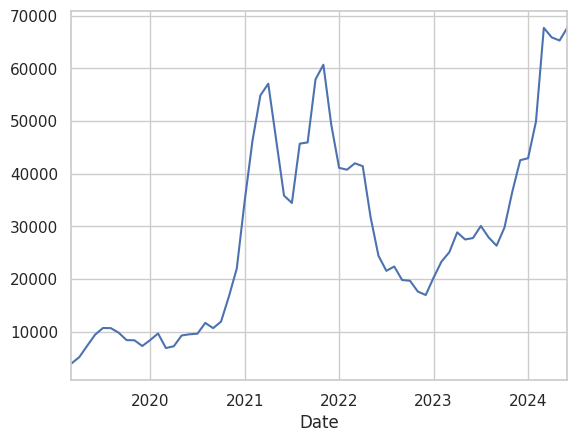

In [ ]:
df_monthly['Price'].plot()

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (4,0,1),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1920
Model:             SARIMAX(4, 0, 1)x(2, 1, [], 7)   Log Likelihood              -16415.736
Date:                            Tue, 18 Jun 2024   AIC                          32847.473
Time:                                    09:46:44   BIC                          32891.924
Sample:                                03-01-2019   HQIC                         32863.831
                                     - 06-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8373      0.029     63.413      0.000       1.780       1.894
ar.L2         -0.6870      0.040    -17.239      0.000      -0.765      -0.609
ar.L3         -0.1920      0.035     -5.442      0.000      -0.261      -0.123
ar.L4          0.0416      0.017      2.429      0.015       0.008       0.075
ma.L1         -0.9960      0.024    -40.836      0.000      -1.044      -0.948
ar.S.L7       -0.6802      0.014    -47.554      0.000      -0.708      -0.652
ar.S.L14      -0.3417      0.014    -24.535      0.000      -0.369      -0.314
sigma2      1.746e+06   5.46e-09   3.19e+14      0.000    1.75e+06    1.75e+06
===================================================================================
Ljung-Box (L1) (Q):                  10.01   Jarque-Bera (JB):              2336.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.92   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+30. Standard errors may be unstable.
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2022-11-04    20214.334179
2022-11-05    21035.642297
2022-11-06    21385.257298
2022-11-07    20906.042643
2022-11-08    20743.962461
                  ...     
2024-05-28    68131.706719
2024-05-29    68990.270905
2024-05-30    67612.308414
2024-05-31    68049.187055
2024-06-01    67734.662572
Freq: D, Name: predicted_mean, Length: 576, dtype: float64

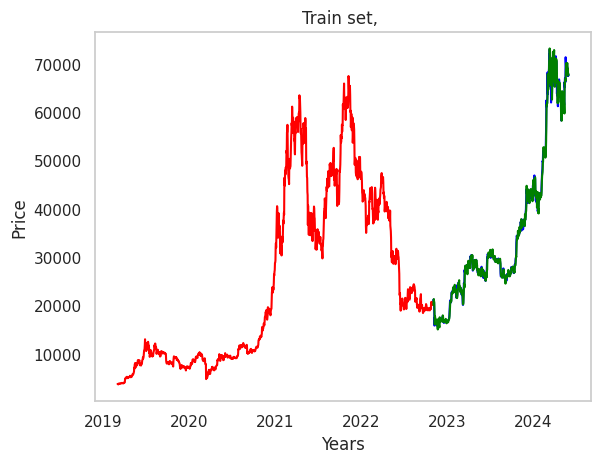

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.020685918968090706
MAE =  751.905042171864
RMSE =  1159.1833267001007


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("Close price ")
plt.ylabel("Close price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("SARIMAX on Ethereum 7:3")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 8:2

In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.8
test_size = 0.2

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1536

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

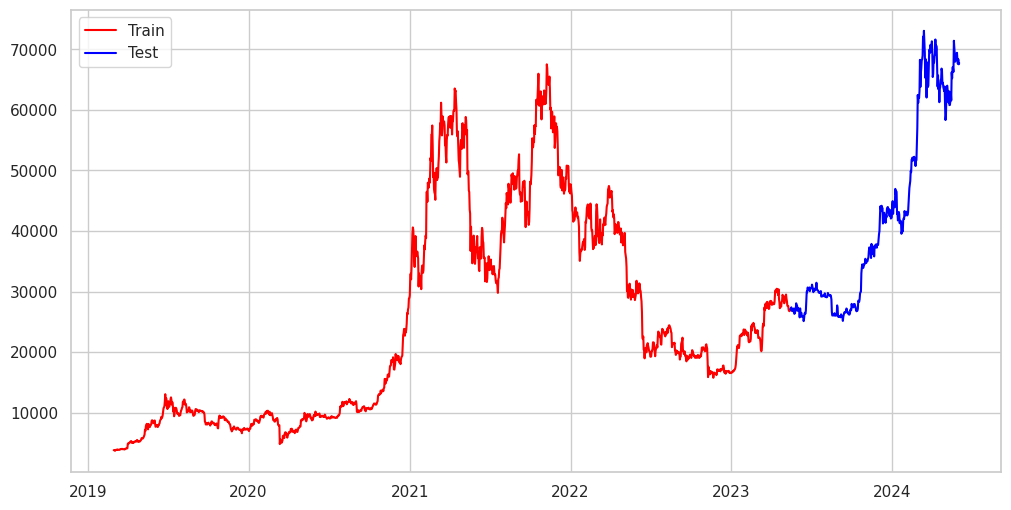

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1920 non-null   float64
 1   Open         1920 non-null   float64
 2   High         1920 non-null   float64
 3   Low          1920 non-null   float64
 4   Vol.         1920 non-null   float64
 5   Change %     1920 non-null   float64
 6   Price_diff   1913 non-null   float64
 7   month_index  1920 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 127.5 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,3821.9,3816.7,3855.8,3816.4,1740000.0,0.0014,NaN,3
2019-03-02,3823.1,3821.9,3843.2,3783.6,1610000.0,0.0003,NaN,3
2019-03-03,3809.5,3823.2,3836.6,3789.7,1510000.0,-0.0036,NaN,3
2019-03-04,3715.9,3809.7,3828.4,3681.8,2850000.0,-0.0245,NaN,3
2019-03-05,3857.2,3715.9,3873.2,3705.7,3820000.0,0.0380,NaN,3
...,...,...,...,...,...,...,...,...
2024-05-28,68366.0,69428.3,69560.7,67299.9,71390.0,-0.0153,-1773.9,5
2024-05-29,67635.8,68366.2,68897.6,67143.2,52130.0,-0.0107,-1519.6,5
2024-05-30,68354.7,67631.3,69504.7,67138.4,66840.0,0.0106,379.0,5


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

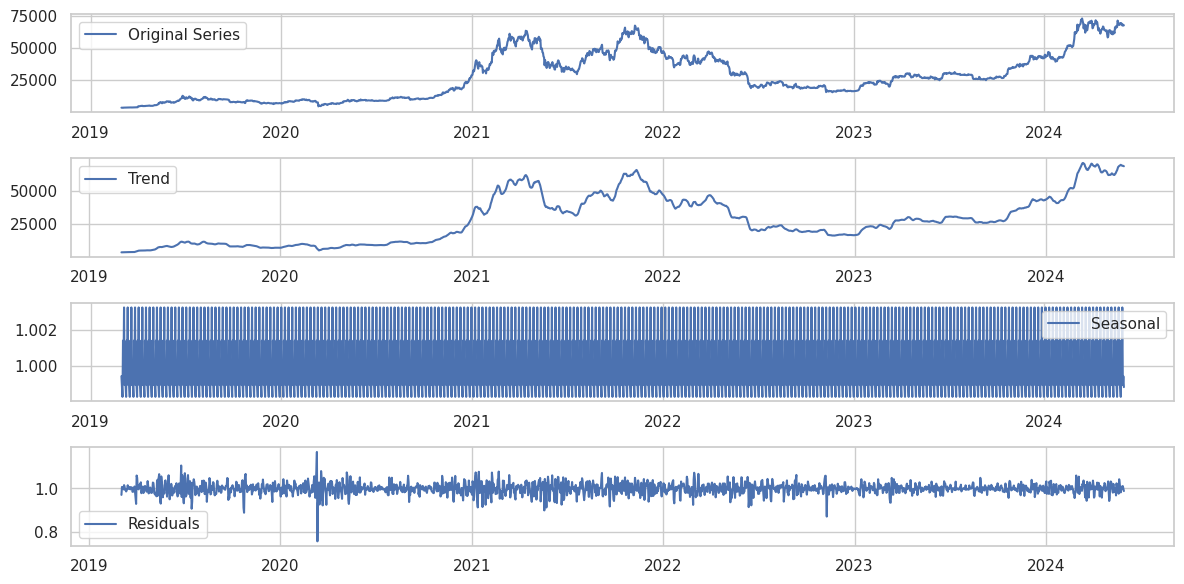

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,3821.9,3816.7,3855.8,3816.4,1740000.0,0.0014,44.0,3
2019-03-02,3823.1,3821.9,3843.2,3783.6,1610000.0,0.0003,44.0,3
2019-03-03,3809.5,3823.2,3836.6,3789.7,1510000.0,-0.0036,44.0,3
2019-03-04,3715.9,3809.7,3828.4,3681.8,2850000.0,-0.0245,44.0,3
2019-03-05,3857.2,3715.9,3873.2,3705.7,3820000.0,0.0380,44.0,3
...,...,...,...,...,...,...,...,...
2024-05-28,68366.0,69428.3,69560.7,67299.9,71390.0,-0.0153,-1773.9,5
2024-05-29,67635.8,68366.2,68897.6,67143.2,52130.0,-0.0107,-1519.6,5
2024-05-30,68354.7,67631.3,69504.7,67138.4,66840.0,0.0106,379.0,5


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,3941.461290,3932.316129,3972.116129,3895.335484,2.637097e+06,0.002406,58.248387,3.0
2019-04-30,5148.216667,5107.760000,5237.056667,5025.746667,1.798474e+06,0.009313,292.786667,4.0
2019-05-31,7295.803226,7191.551613,7470.841935,7012.570968,1.416096e+06,0.016413,727.903226,5.0
2019-06-30,9404.706667,9329.010000,9707.633333,9021.913333,7.688410e+05,0.009213,757.670000,6.0
2019-07-31,10672.509677,10696.096774,11071.674194,10257.441935,7.639442e+05,-0.000965,-454.912903,7.0
...,...,...,...,...,...,...,...,...
2024-02-29,49866.606897,49225.993103,50426.855172,48647.110345,5.791931e+04,0.012852,3258.548276,2.0
2024-03-31,67682.903226,67353.406452,69242.709677,65591.245161,8.757516e+04,0.005697,3280.258065,3.0
2024-04-30,65877.343333,66234.613333,67404.343333,64228.636667,9.018267e+04,-0.005017,-1575.620000,4.0


<Axes: xlabel='Date'>

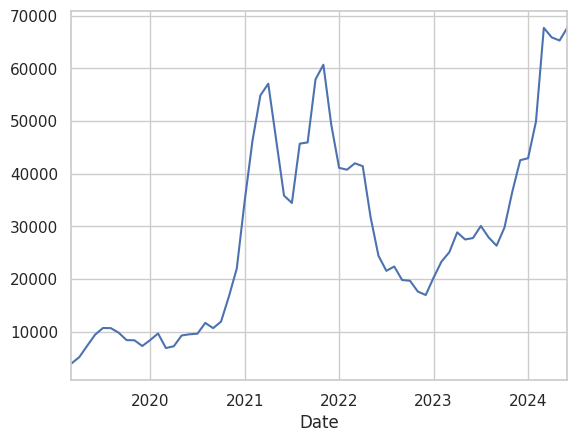

In [ ]:
df_monthly['Price'].plot()

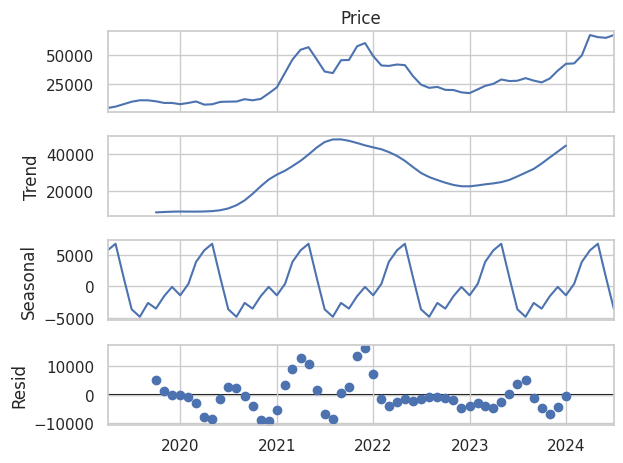

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=11.57 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=36038.433, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=33017.088, Time=5.64 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=34689.097, Time=5.05 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=36048.380, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=33573.688, Time=0.37 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=32830.898, Time=14.16 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=16.21 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=10.97 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=36040.893, Time=1.61 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=32831.040, Time=14.55 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=32831.269, Time=13.79 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=34690.144, Time=6.28 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=32829.672, Time=14.66 sec
 ARIMA(2,0,1)(1,1,0)[7] interc

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (4,0,1),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1920
Model:             SARIMAX(4, 0, 1)x(2, 1, [], 7)   Log Likelihood              -16415.736
Date:                            Tue, 18 Jun 2024   AIC                          32847.473
Time:                                    09:59:38   BIC                          32891.924
Sample:                                03-01-2019   HQIC                         32863.831
                                     - 06-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8373      0.029     63.413      0.000       1.780       1.894
ar.L2         -0.6870      0.040    -17.239      0.000      -0.765      -0.609
ar.L3         -0.1920      0.035     -5.442      0.000      -0.261      -0.123
ar.L4          0.0416      0.017      2.429      0.015       0.008       0.075
ma.L1         -0.9960      0.024    -40.836      0.000      -1.044      -0.948
ar.S.L7       -0.6802      0.014    -47.554      0.000      -0.708      -0.652
ar.S.L14      -0.3417      0.014    -24.535      0.000      -0.369      -0.314
sigma2      1.746e+06   5.46e-09   3.19e+14      0.000    1.75e+06    1.75e+06
===================================================================================
Ljung-Box (L1) (Q):                  10.01   Jarque-Bera (JB):              2336.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.92   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+30. Standard errors may be unstable.
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2023-05-15    26289.434184
2023-05-16    27582.814161
2023-05-17    27350.743895
2023-05-18    27500.674621
2023-05-19    27106.538140
                  ...     
2024-05-28    68131.706719
2024-05-29    68990.270905
2024-05-30    67612.308414
2024-05-31    68049.187055
2024-06-01    67734.662572
Freq: D, Name: predicted_mean, Length: 384, dtype: float64

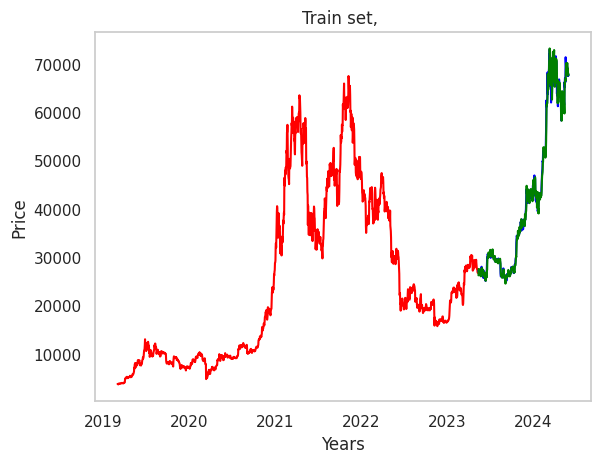

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.019052166896349806
MAE =  863.45043271053
RMSE =  1317.2936868821662


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("Close price ")
plt.ylabel("Close price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("SARIMAX on Ethereum 7:3")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()
